In [ ]:
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

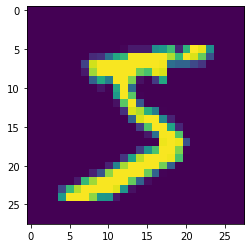

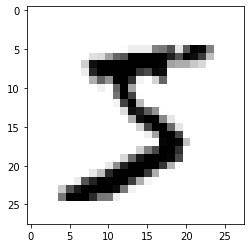

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
 
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

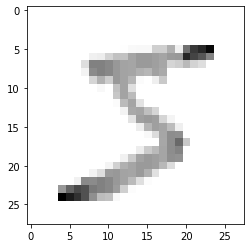

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
print("Total training samples=",len(x_trainr))

Total training samples= 60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 14s 5ms/step - loss: 0.3421 - accuracy: 0.8921 - val_loss: 0.1275 - val_accuracy: 0.9611
Epoch 2/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1147 - accuracy: 0.9645 - val_loss: 0.1136 - val_accuracy: 0.9642
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.0829 - val_accuracy: 0.9755
Epoch 4/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0741 - val_accuracy: 0.9783
Epoch 5/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0502 - accuracy: 0.9837 - val_loss: 0.0647 - val_accuracy: 0.9802


In [ ]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("test loss on 10k samples",test_loss)
print("validation accuracy on 10k samples",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0571 - accuracy: 0.9833
test loss on 10k samples 0.057085148990154266
validation accuracy on 10k samples 0.983299970626831


In [ ]:
predictions=model.predict([x_testr])

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(predictions)

[[5.0509839e-06 2.8353252e-05 8.1813378e-05 ... 9.9945384e-01
  2.4251256e-06 2.6297566e-04]
 [2.2852620e-04 4.4875458e-05 9.9965775e-01 ... 1.0622364e-05
  4.1718933e-05 2.2623976e-06]
 [4.7655379e-07 9.9997735e-01 2.5591066e-06 ... 4.7725625e-06
  5.6682745e-07 8.4440408e-08]
 ...
 [9.3973819e-07 8.8796304e-07 1.0570643e-07 ... 2.1564881e-06
  1.1259927e-05 3.7519527e-05]
 [2.4194944e-07 1.0267555e-07 1.3290585e-09 ... 1.3037938e-07
  5.0665647e-05 1.2861345e-06]
 [1.7930088e-05 1.2417203e-05 1.0234067e-04 ... 1.3158934e-08
  1.6138232e-06 4.5464724e-08]]


In [ ]:
print(np.argmax(predictions[19]))

4


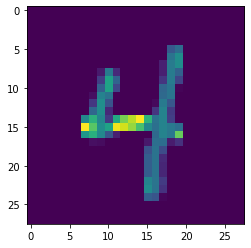

In [ ]:
plt.imshow(x_test[19])

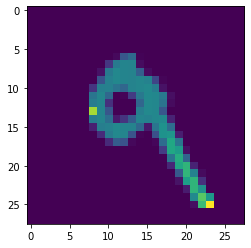

In [ ]:
plt.imshow(x_test[7])

In [ ]:
print(np.argmax(predictions[7]))

9
